## Installing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


## Data Loading 

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


## Data Cleaning

In [5]:
df['Rating'] = df['Rating'].fillna(df.groupby('Category')['Rating'].transform('mean'))
df.dropna(subset=['App', 'Category', 'Type'], inplace=True)

In [6]:
df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.189143,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.500000,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


## Normalize columns:

In [7]:
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].str.replace('M', '').str.replace('k', 'e-3', regex=False)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Handle 'Price' column
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [8]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.189143,3,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.500000,398307,19.0,10000000.0,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


## Remove duplicates:

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  object 
 4   Size            8831 non-null   float64
 5   Installs        10356 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10356 non-null  float64
 8   Content Rating  10356 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10354 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB
None
             Rating         Size      Installs         Price
count  10357.000000  8831.000000  1.035600e+04  10356.000000
mean       4.188536    21.287788  1.415913

# Visualizations:

## Ratings Distribution:

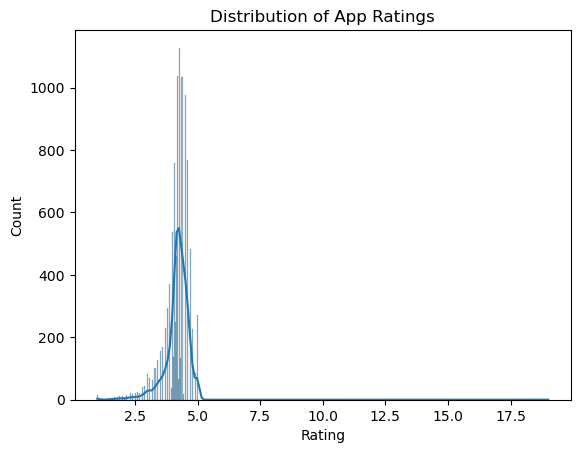

In [12]:
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of App Ratings')
plt.show()

Most apps have a rating between 4.0 and 4.5, indicating a generally positive user experience. A few outliers exist, with very low or very high ratings.

## Top Categories by Apps:

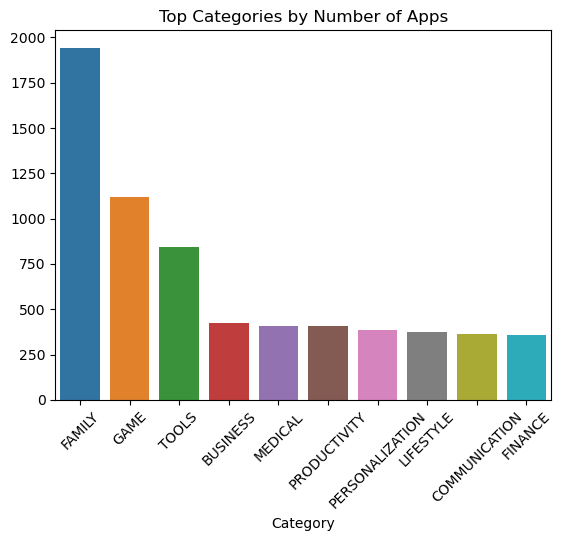

In [13]:
top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=45)
plt.title('Top Categories by Number of Apps')
plt.show()

The "Family" and "Game" categories dominate in terms of app count, likely due to their popularity among developers and consumers.

## Installs vs Ratings by Category:

C:\Users\Tushar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


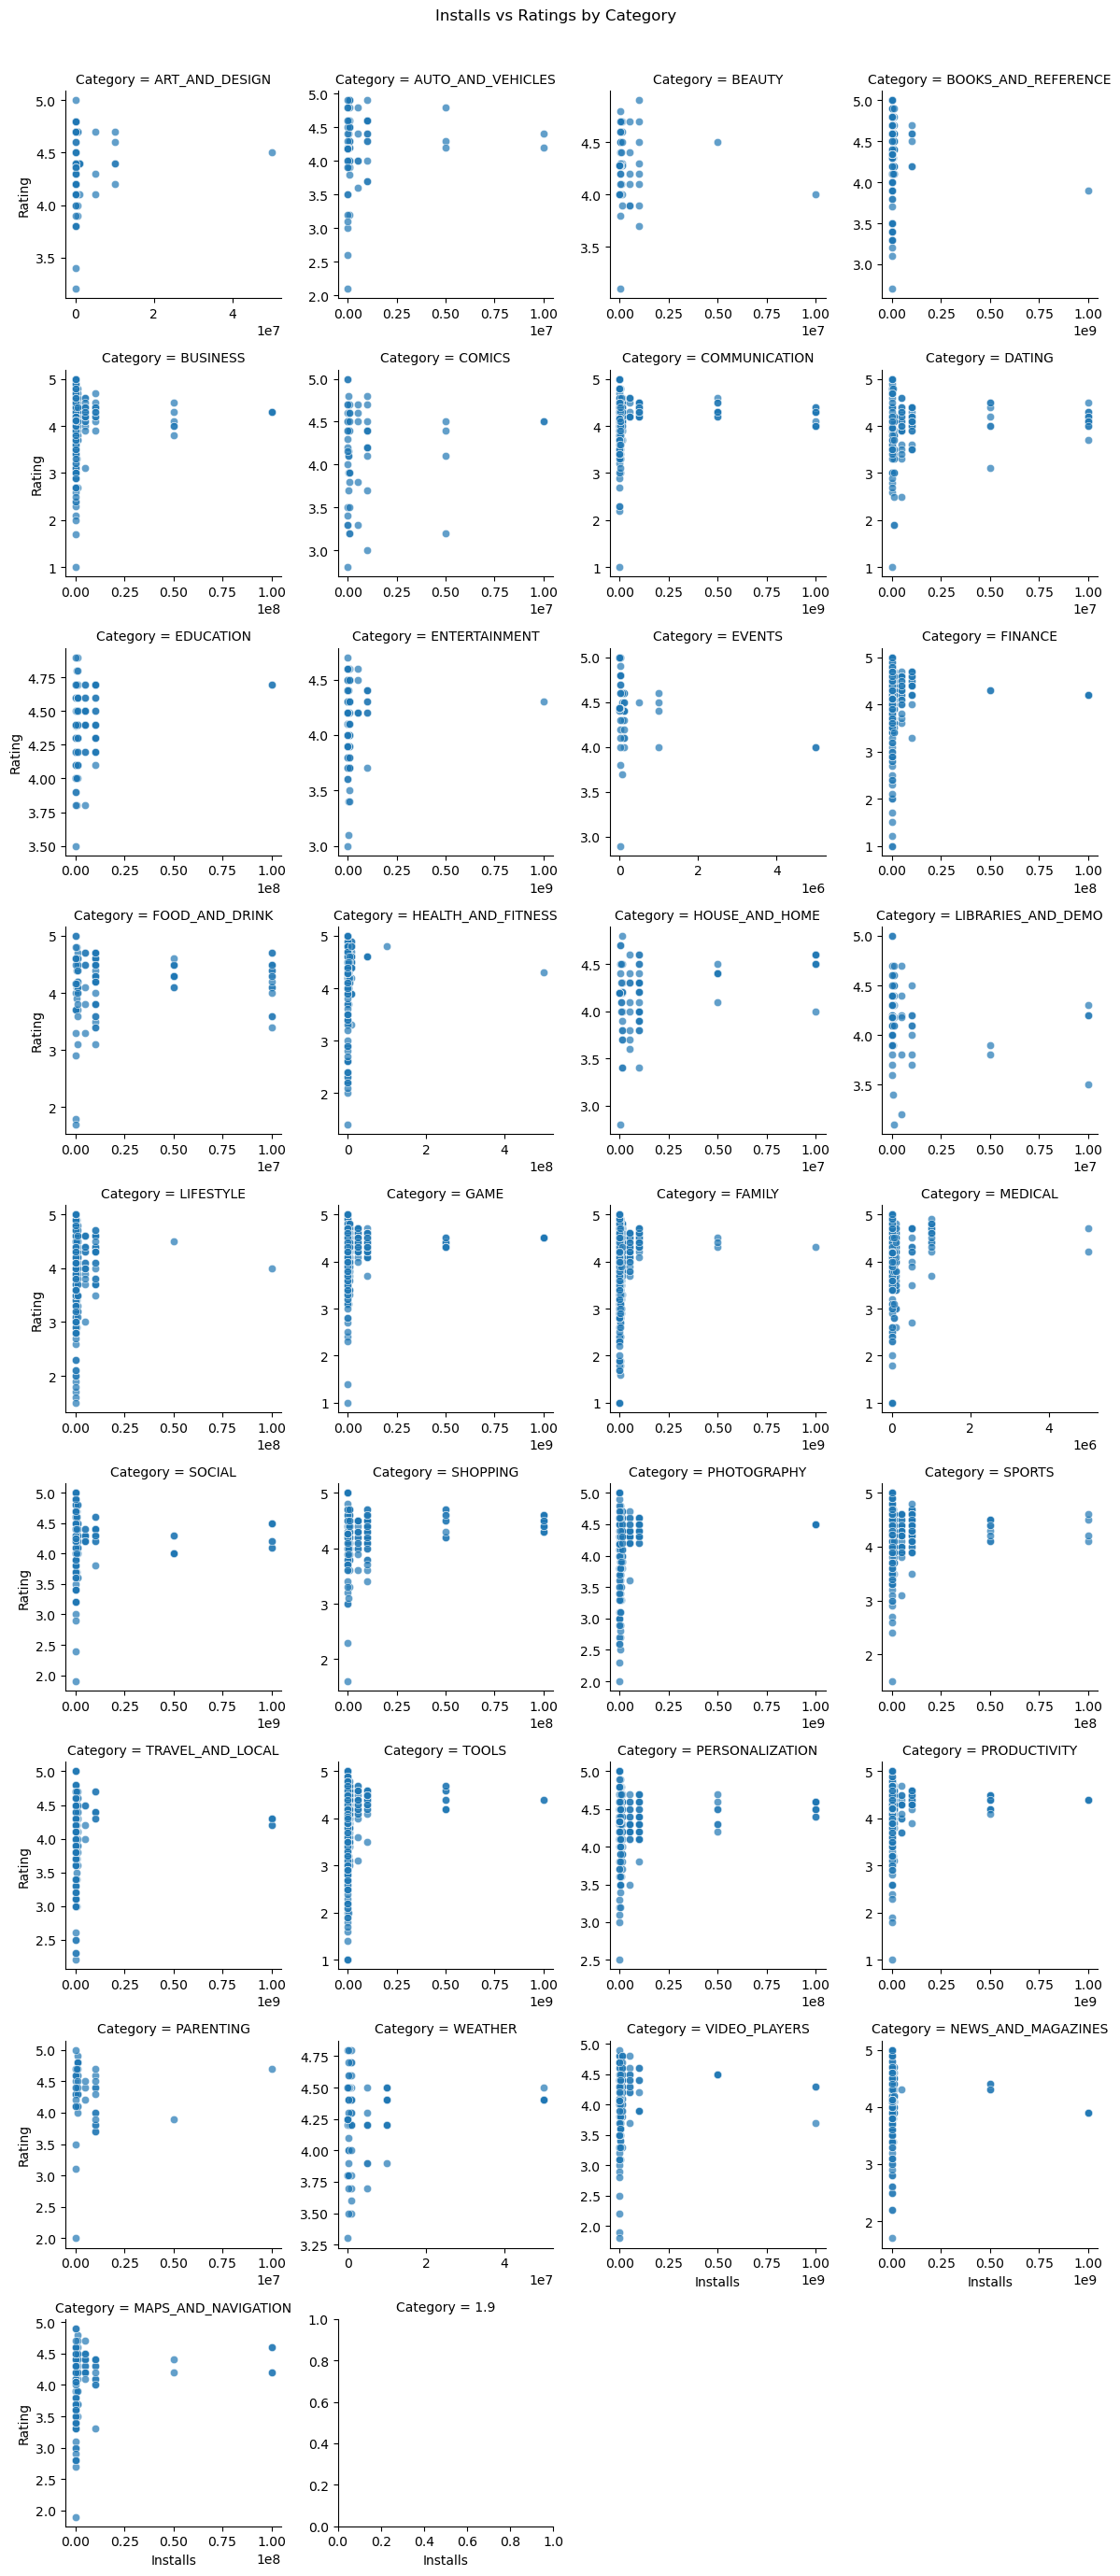

In [14]:
g = sns.FacetGrid(df, col='Category', col_wrap=4, height=3, sharex=False, sharey=False)
g.map(sns.scatterplot, 'Installs', 'Rating', alpha=0.7)
g.fig.suptitle('Installs vs Ratings by Category', y=1.02)
plt.show()


Categories like "Game" show a wide range of installs with varying ratings, while others like "Medical" have a smaller user base but consistently high ratings.

## Correlation Heatmap:

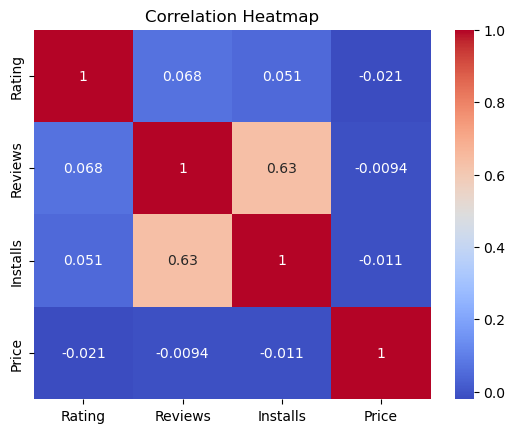

In [20]:
corr = df[['Rating', 'Reviews', 'Installs', 'Price']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There is a moderate positive correlation between reviews and installs, but price has little to no correlation with other variables.

## Relationship Between Ratings and Installs

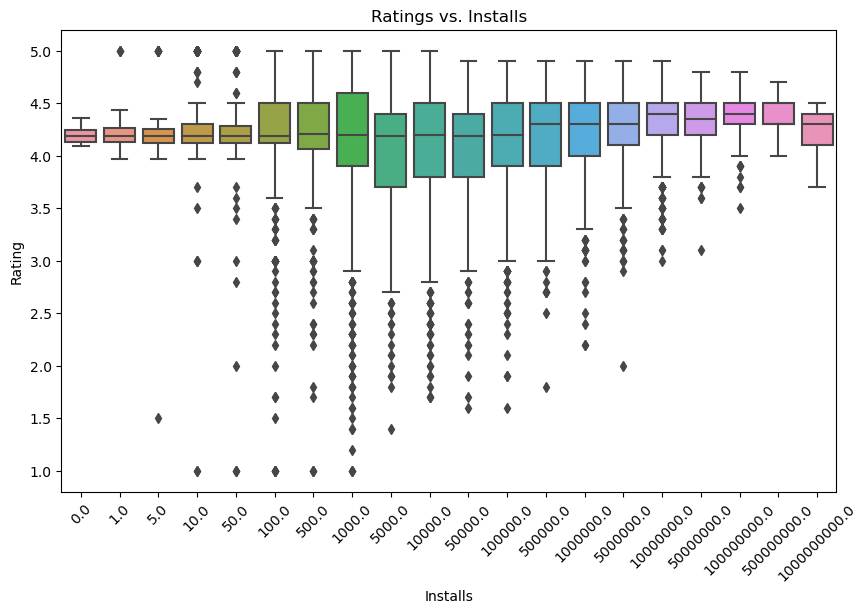

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Installs', y='Rating', data=df)
plt.xticks(rotation=45)
plt.title('Ratings vs. Installs')
plt.show()


Categories like "Family" and "Health & Fitness" generate significant revenue, likely due to the popularity of paid or subscription-based apps.

## Category-Wise Revenue 

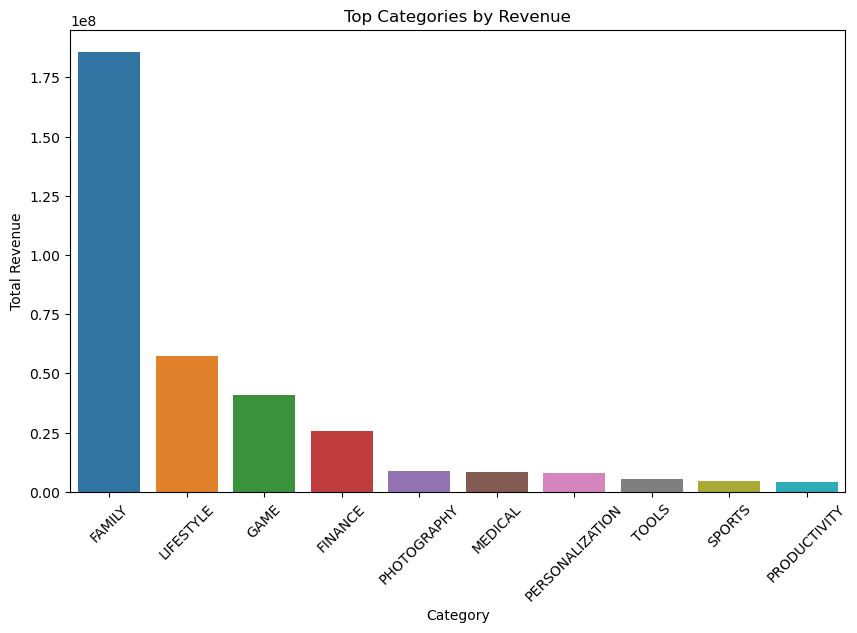

In [22]:
df['Revenue'] = df['Price'] * df['Installs']
category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.xticks(rotation=45)
plt.title('Top Categories by Revenue')
plt.ylabel('Total Revenue')
plt.show()


Categories like "Family" and "Health & Fitness" generate significant revenue, likely due to the popularity of paid or subscription-based apps.

## Install Behavior by App Type

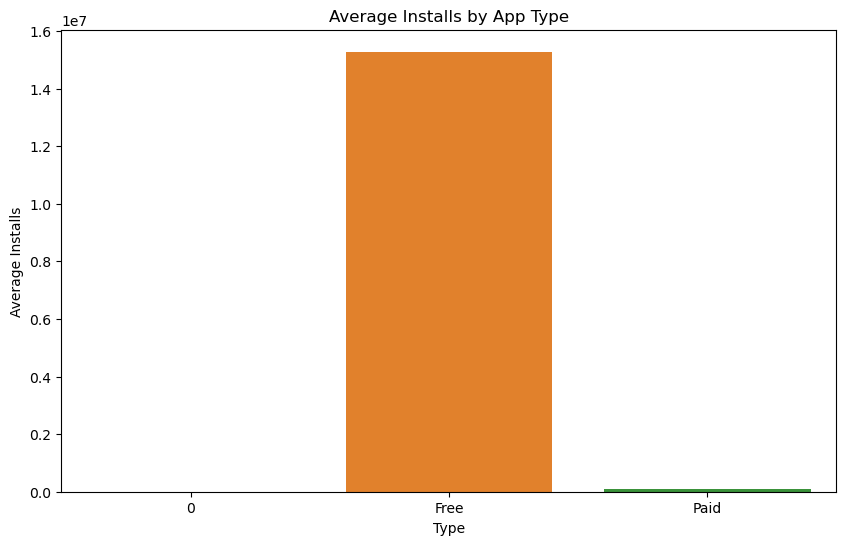

In [23]:
type_installs = df.groupby('Type')['Installs'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=type_installs.index, y=type_installs.values)
plt.title('Average Installs by App Type')
plt.ylabel('Average Installs')
plt.show()


Free apps have significantly more installs on average, reflecting user preference for cost-free options.

# Conclusion

#### The analysis of Google Play Store data reveals key insights into user behavior, app performance, and category trends:
* Most apps maintain a high average rating, showcasing a strong focus on quality by developers.
* Popular categories like "Family" and "Game" dominate the store, both in app count and revenue potential.
* Free apps attract more users, indicating the importance of accessibility in app adoption.
* Moderate correlations between installs and reviews suggest that user feedback drives downloads to some extent.